## Human Activity Recognition Using Accelerometer Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

files.upload()

Mounted at /content/drive


Saving WISDM_ar_v1.1_raw.txt to WISDM_ar_v1.1_raw.txt


Watch Full Video Here: https://youtu.be/lUI6VMj43PE 

<img src="https://miro.medium.com/max/2000/1*vjMyFvefRQbLix7WAyQA1w.png">
source = “Deep Neural Network Example” by Nils Ackermann is licensed under Creative Commons CC BY-ND 4.0

Dataset Link: http://www.cis.fordham.edu/wisdm/dataset.php

The WISDM dataset contains six different labels (Downstairs, Jogging, Sitting, Standing, Upstairs, Walking). 

In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.9.2


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Load the Dataset 

In [61]:
pd.read_csv('/content/WISDM_ar_v1.1_raw.txt')

ParserError: ignored

In [59]:
file = open('/content/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [60]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [62]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [64]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [65]:
data.shape

(343416, 6)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [67]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [68]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

### Balance this data 

In [69]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [71]:
Fs = 20

In [72]:
activities = data['activity'].value_counts().index

In [73]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

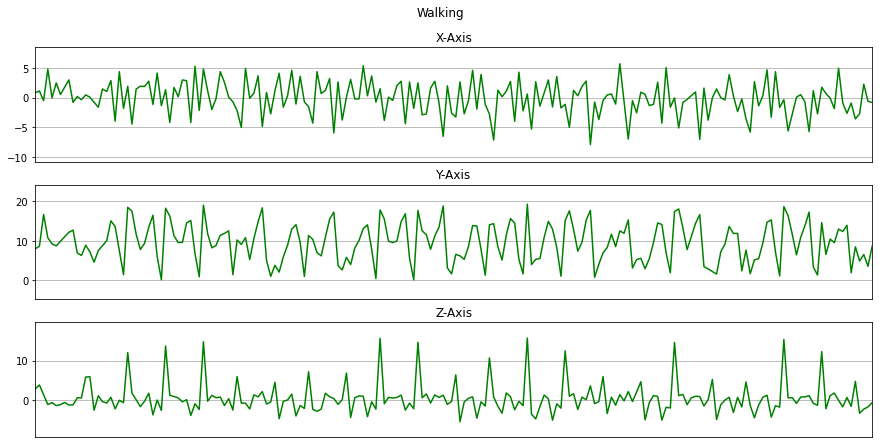

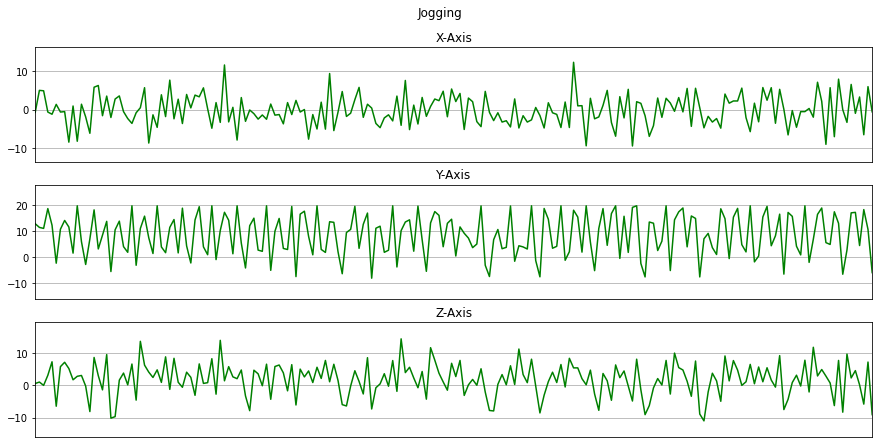

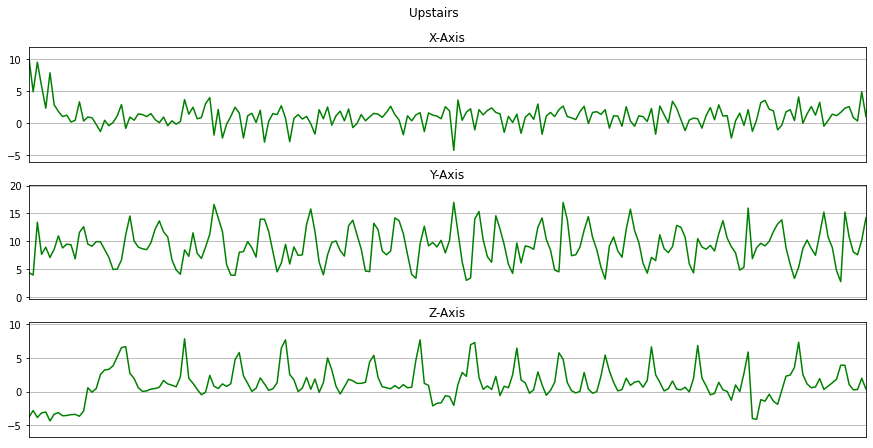

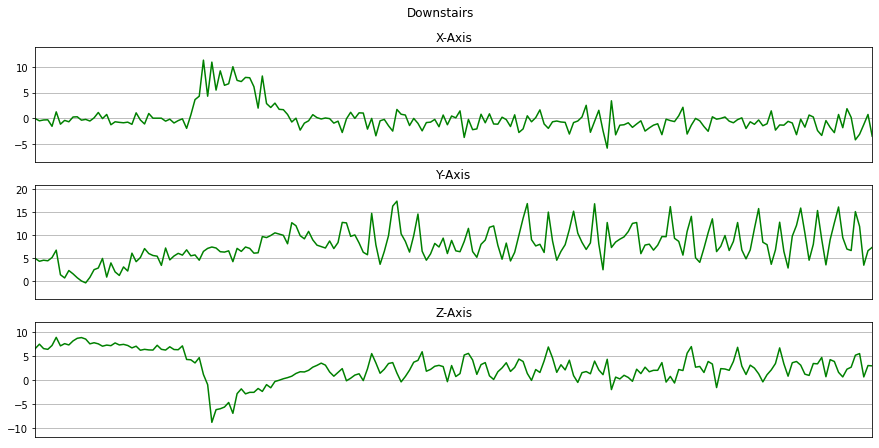

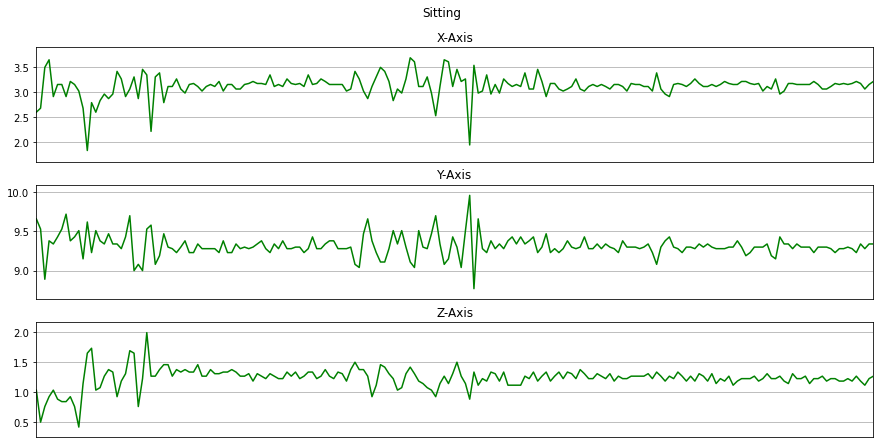

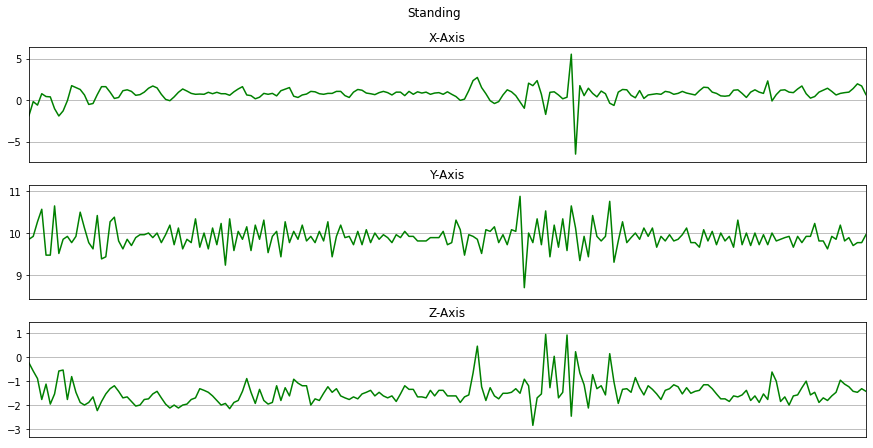

In [74]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [75]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [76]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [77]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()


In [78]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [79]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [80]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [83]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### Standardized data 

In [84]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


### Frame Preparation 

In [86]:
import scipy.stats as stats

In [87]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [88]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [89]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [90]:
X.shape, y.shape

((532, 80, 3), (532,))

In [91]:
(3555*6)/40

533.25

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [93]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [94]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [95]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [96]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2D CNN Model 

In [97]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [98]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [99]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
14/14 [==============================] - 1s 28ms/step - loss: 1.5951 - accuracy: 0.2376 - val_loss: 1.2730 - val_accuracy: 0.3364
Epoch 2/10
14/14 [==============================] - 0s 11ms/step - loss: 1.1808 - accuracy: 0.5012 - val_loss: 0.8565 - val_accuracy: 0.8692
Epoch 3/10
14/14 [==============================] - 0s 13ms/step - loss: 0.8425 - accuracy: 0.6800 - val_loss: 0.5670 - val_accuracy: 0.8692
Epoch 4/10
14/14 [==============================] - 0s 13ms/step - loss: 0.6313 - accuracy: 0.7882 - val_loss: 0.4350 - val_accuracy: 0.8505
Epoch 5/10
14/14 [==============================] - 0s 13ms/step - loss: 0.5363 - accuracy: 0.7835 - val_loss: 0.3664 - val_accuracy: 0.8879
Epoch 6/10
14/14 [==============================] - 0s 11ms/step - loss: 0.4453 - accuracy: 0.8306 - val_loss: 0.3212 - val_accuracy: 0.9065
Epoch 7/10
14/14 [==============================] - 0s 13ms/step - loss: 0.3966 - accuracy: 0.8659 - val_loss: 0.3042 - val_accuracy: 0.9159
Epoch 8/10
14

In [100]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

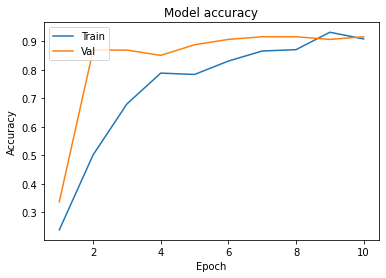

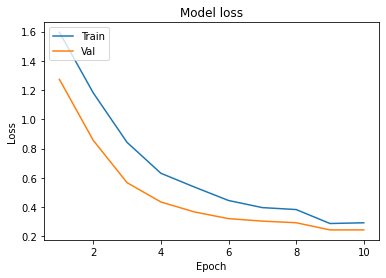

In [101]:
plot_learningCurve(history, 10)

### Confusion Matrix 

Detailed video is available here: https://youtu.be/SToqP9V9y7Q

pip install mlxtend -> http://rasbt.github.io/mlxtend/installation/ 

In [102]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [105]:
# y_pred = model.predict_classes(X_test)

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
y_pred=classes_x

4/4 [==============================] - 0s 7ms/step


In [106]:
mat = confusion_matrix(y_test, y_pred)

TypeError: ignored

In [110]:
mat

array([[16,  0,  0,  0,  2,  0],
       [ 0, 17,  0,  0,  0,  1],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0],
       [ 5,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  1,  0, 16]])

In [122]:
# model.save_weights('model.h5')
model.save('model.h5')
model = tf.keras.models.load_model("/content/model.h5")
tf.saved_model.save(model, "tmp_model")

In [123]:
import onnx

In [124]:
!python -m tf2onnx.convert --saved-model tmp_model --output "Activity_model_2.onnx"

/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-12-13 06:29:50,052 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-12-13 06:29:50,479 - INFO - Signatures found in model: [serving_default].
2022-12-13 06:29:50,479 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-12-13 06:29:50,479 - INFO - Output names: ['dense_3']
2022-12-13 06:29:50,619 - INFO - Using tensorflow=2.9.2, onnx=1.13.0, tf2onnx=1.13.0/2c1db5
2022-12-13 06:29:50,619 - INFO - Using opset <onnx, 13>
2022-12-13 06:29:50,671 - INFO - Computed 0 values for constant folding
2022-12-13 06:29:50,718 - INFO - Optimizing ONNX model
2022-12-13 06:29:50,774 - INFO - After optimization: Cast -1 (1->0), Const +1 (9->10), Identity -2 (2->0), Reshape +1 (1->2), Transpose -3 (4->1)
2